In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

import warnings
warnings.simplefilter('ignore', category=FutureWarning)

# Исследование датасета

In [107]:
df = pd.read_csv('german_credit_data.csv').drop('Unnamed: 0', axis = 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [109]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [110]:
df.describe(include = 'object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [111]:
# Пропущенные значения в %

round(df.isnull().sum() / df.shape[0] * 100, 2)

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [112]:
df['Saving accounts'].value_counts() # Кол-во значений в колонке Saving accounts


little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [113]:
df['Checking account'].value_counts() # Кол-во значений в колонке Checking account

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

В признаке Checking account пропущенно около 40 % значений, и нет ярко выраженной mode. Поэтому данную колонку лучше всего удалить

In [114]:
# Удаление колонки Checking account

df.drop(['Checking account'], axis = 1, inplace = True)

In [115]:
# Замена пропущенных значений в Saving accounts на mode

df.fillna(df.mode().iloc[0], inplace = True)

# Переводим категориальные признаки в числовые

In [116]:
from sklearn.preprocessing import LabelEncoder

obj_cols = list(df.select_dtypes(include = ['object']).columns)

encoder = LabelEncoder()

for col in obj_cols:
    df[col] = encoder.fit_transform(df[col])
    
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,1,2,1,0,1169,6,5
1,22,0,2,1,0,5951,48,5
2,49,1,1,1,0,2096,12,3
3,45,1,2,0,0,7882,42,4
4,53,1,2,0,0,4870,24,1


# Распределение данных

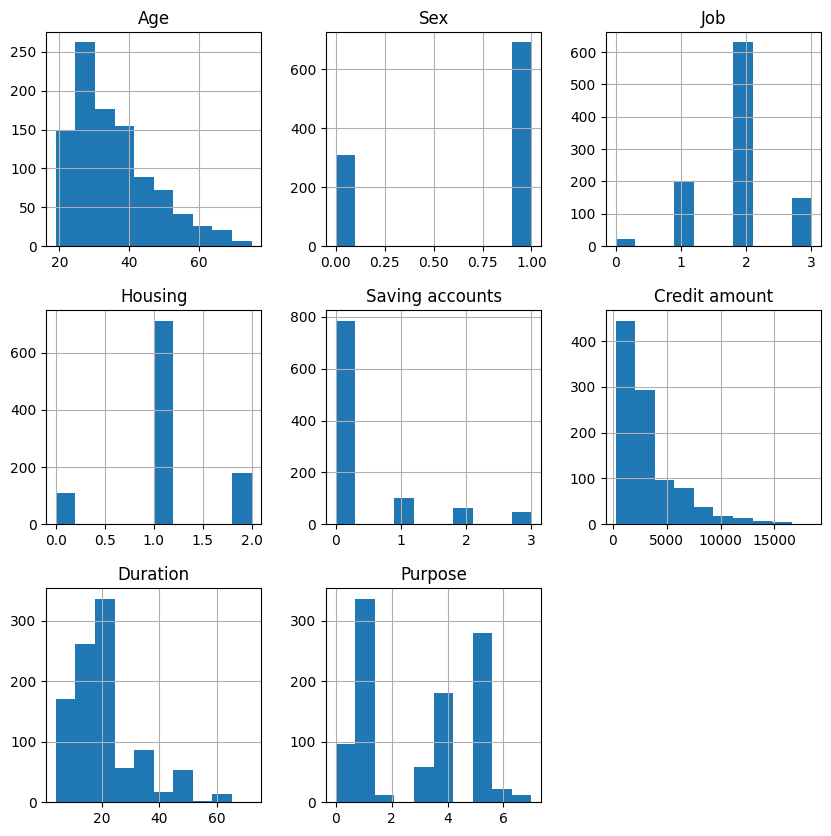

In [117]:
df.hist(figsize = (10, 10));

# Корреляции переменных

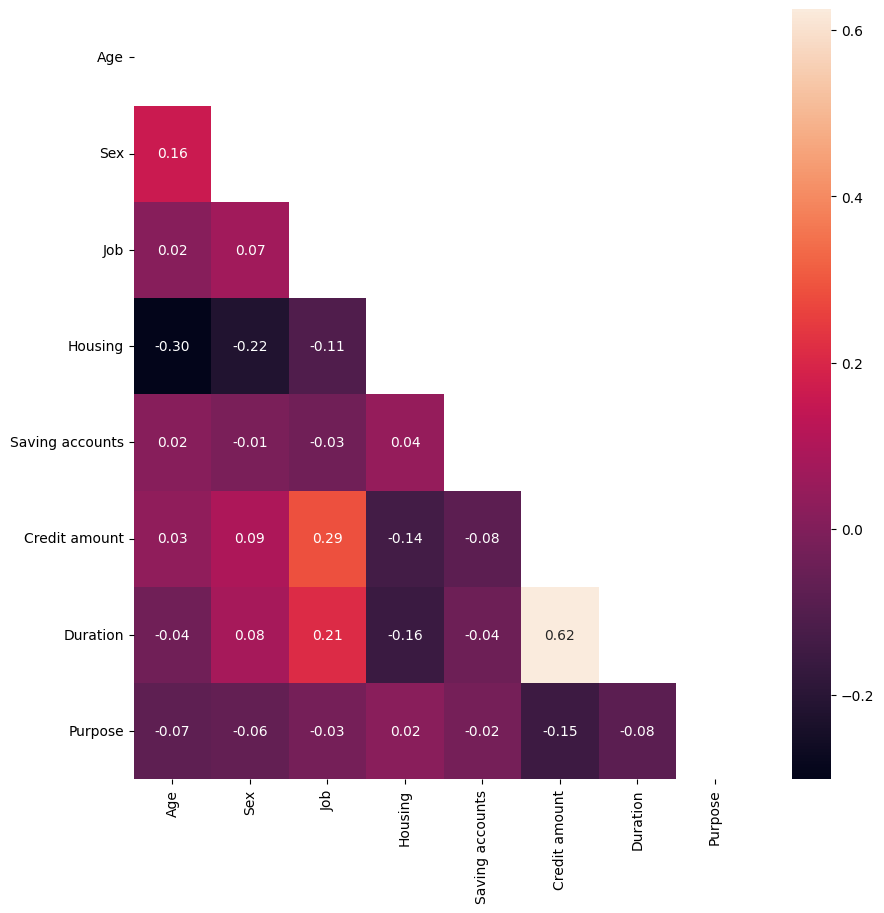

In [118]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (10, 10))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f')
plt.show()

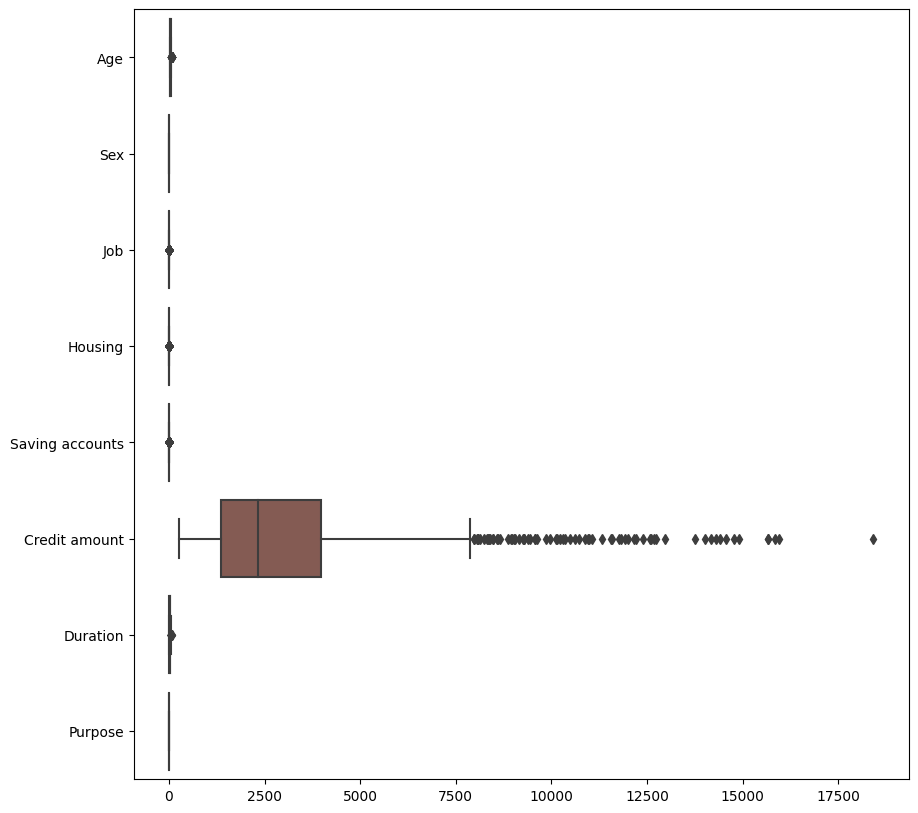

In [119]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df, orient = 'h');

Данные находятся в разных маштабах от 1 до целых тысяч. Необходимо шкалировать данные

# Шкалирование данных

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(X_scaled, columns = df.columns)

df_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,2.766456,0.670280,0.146949,-0.133710,-0.463409,-0.745131,-1.236478,1.073263
1,-1.191404,-1.491914,0.146949,-0.133710,-0.463409,0.949817,2.248194,1.073263
2,1.183312,0.670280,-1.383771,-0.133710,-0.463409,-0.416562,-0.738668,0.061705
3,0.831502,0.670280,0.146949,-2.016956,-0.463409,1.634247,1.750384,0.567484
4,1.535122,0.670280,0.146949,-2.016956,-0.463409,0.566664,0.256953,-0.949853


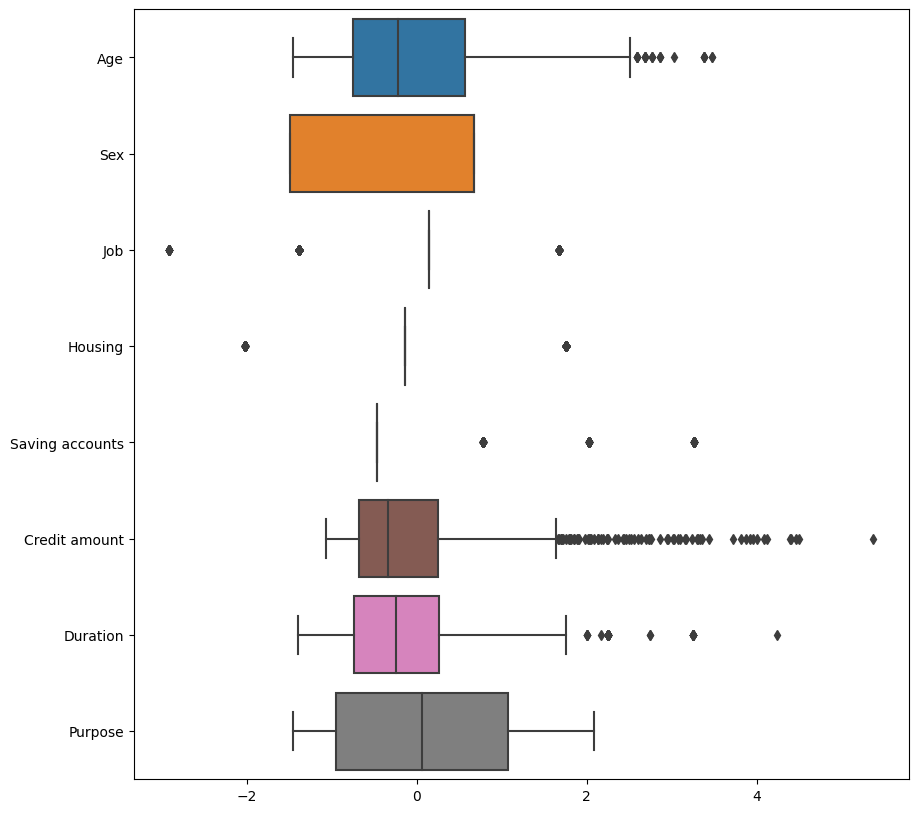

In [121]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_scaled, orient = 'h');

# Снижение размерности для визуализации

In [122]:
import umap

reducer = umap.UMAP()

X_umap = reducer.fit_transform(X_scaled)
X_umap.shape

(1000, 2)

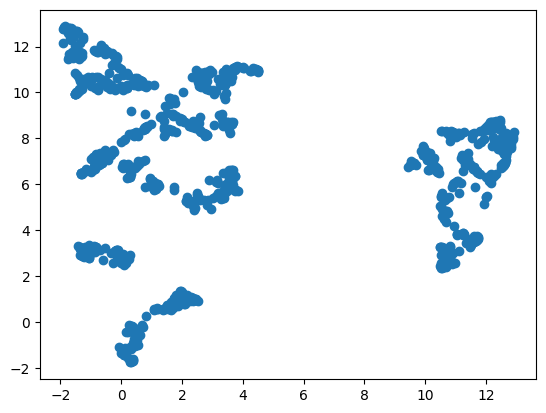

In [123]:
plt.scatter(X_umap[:, 0], X_umap[:, 1]);

# Кластеризация K-means

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

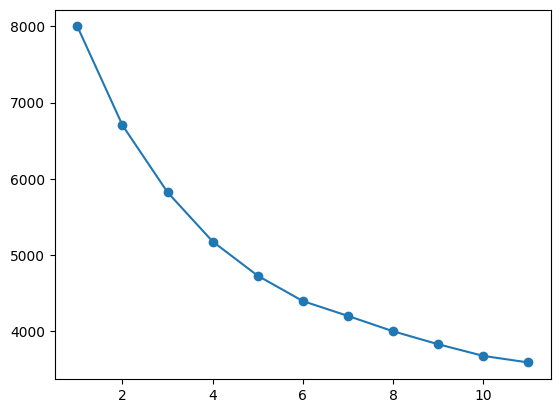

In [124]:
# Подбор оптимального кол-ва кластеров пр помощи метода локтя

from sklearn.cluster import KMeans

inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, random_state = 17).fit(X_scaled)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    
plt.plot(range(1, 12), inertia, marker = 'o');

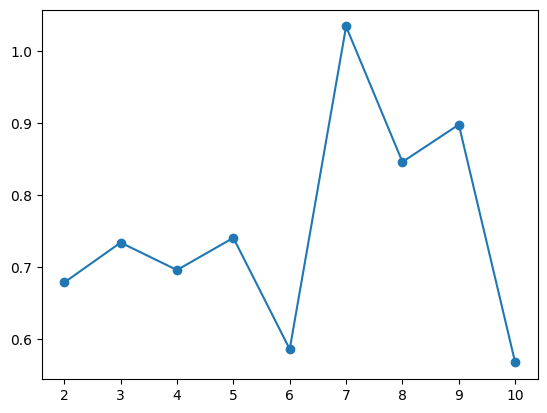

In [125]:
# Подбор оптимального кол-ва кластеров при помощи переломного момента

D = []
for i in range(1, 10):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
    
plt.plot(range(2, 11), D, marker = 'o');

Переломный момент указывает на оптимальное оптимальное кол-во кластеров равное 6

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

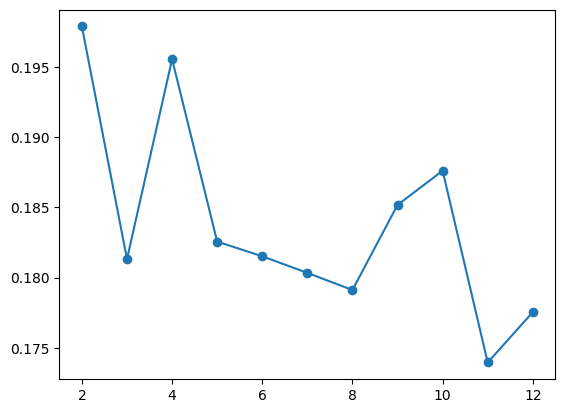

In [126]:
# Подбор оптимального кол-ва кластеров при помощи Силуэтного коэффициента

from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 13):
    kmeans = KMeans(n_clusters = i, random_state = 17).fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)
    
plt.plot(range(2, 13), silhouette, marker = 'o');

silhouette_score указывает на 2 кластера

In [127]:
# алгоритм k_means на 2 кластера

kmeans = KMeans(n_clusters = 2, random_state = 17).fit(X_scaled)
kmeans_labels = kmeans.labels_




C:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



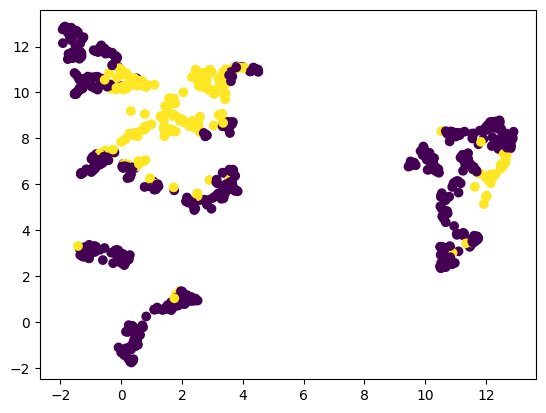

In [128]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = kmeans_labels);

# Кластеризация hierarhical 

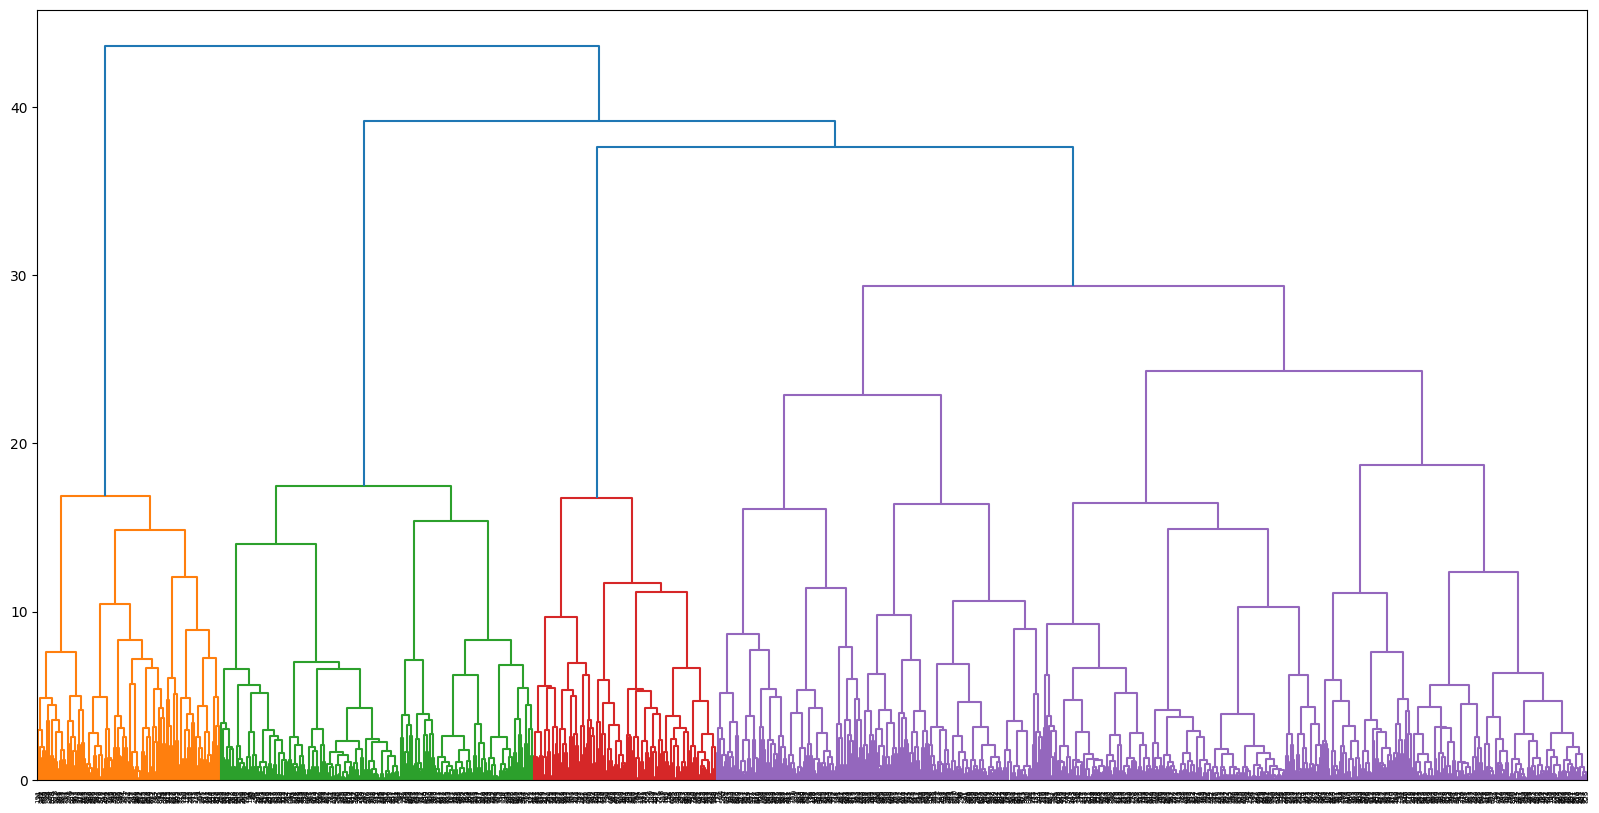

In [129]:
# Визуализация иерархической кластеризации

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (20, 10))
linkage_ = linkage(X_scaled, method = 'ward')
dendrogram_ = dendrogram(linkage_)

Судя по графику необходимое кол-во кластеров равно: 2, 4 или 5. Проверим визуальные догадки при помощи silhouette_score 

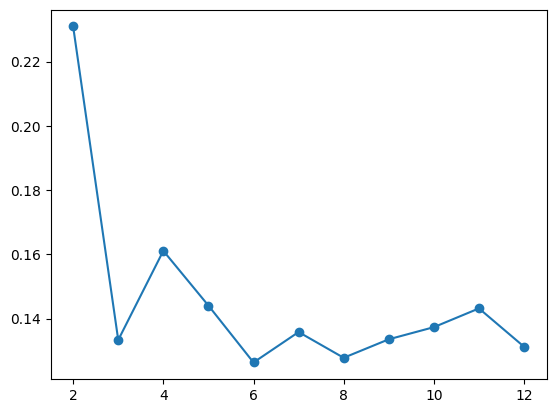

In [130]:
# Подбор оптимального кол-ва кластеров при помощи Силуэтного коэффициента

from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 13):
    agg = AgglomerativeClustering(n_clusters = i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)
    
plt.plot(range(2, 13), silhouette, marker = 'o');

silhouette_score также говорит нам о 2-х или 4-х кластерах. Возьмём 2 кластера

In [131]:
# алгоритм AgglomerativeClustering на 2 кластера

agg = AgglomerativeClustering(n_clusters = 2).fit(X_scaled)
agg_labels = agg.labels_



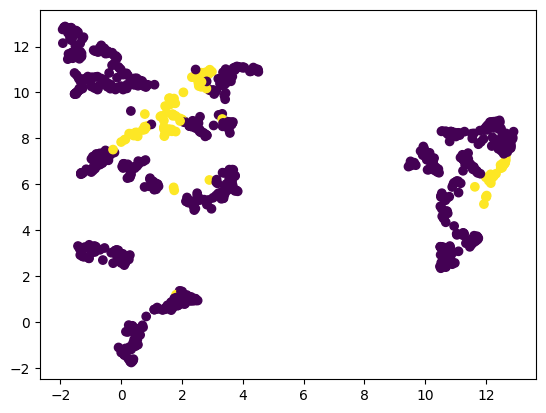

In [132]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = agg_labels);

# Кластеризация DBSCAN

In [133]:
# Подбор оптимального eps для алгоритма DBSCAN

from sklearn.cluster import DBSCAN

silhouette = []
clusters = []
eps_range = np.arange(0.1, 2, 0.1)
for i in eps_range:
    dbscan = DBSCAN(eps = i).fit(X_scaled)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

In [134]:
# Подбор оптимального eps для алгоритма DBSCAN


from sklearn.cluster import DBSCAN

def dbscan_clustering(eps_range, X_scaled):

    silhouette = []
    clusters = []
    eps_range = eps_range
    for i in eps_range:
        dbscan = DBSCAN(eps = i).fit(X_scaled)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker = 'o', color = color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color = color)
    ax1.tick_params(axis = 'y', labelcolor = color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker = 'o', color = color)
    ax2.set_ylabel('n_clusters', color = color)
    ax2.tick_params(axis = 'y', labelcolor = color)

    fig.tight_layout()
    plt.show()

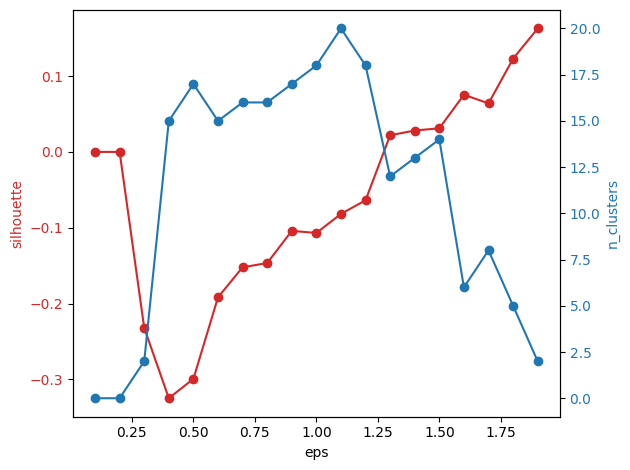

In [135]:
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, X_scaled)

Убираем eps, где silhouette_score меньше 0

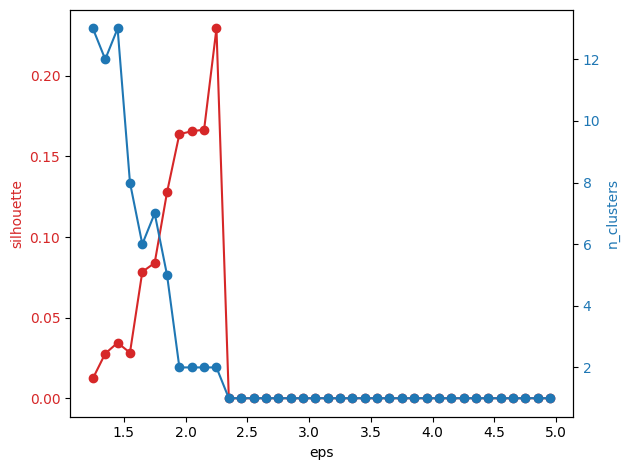

In [136]:
eps_range = np.arange(1.25,5,0.1)
dbscan_clustering(eps_range, X_scaled)

Из графика выдно что при eps = 2.1, можно достигнуть почти максималльного silhouette score при кол-ве класетор равным 2-м.

In [137]:
# алгоритм DBSCAN на 2 кластера

dbscan = DBSCAN(eps=2.1).fit(X_scaled)
dbscan_labels = dbscan.labels_



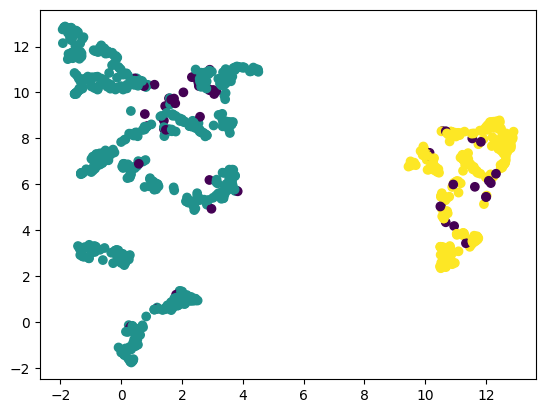

In [138]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = dbscan_labels);

# Интерпритация k_means

In [139]:


df['km_labels'] = kmeans_labels

df['km_labels'].value_counts(normalize = True)

0    0.745
1    0.255
Name: km_labels, dtype: float64

In [140]:
# Расчет средних значений признаков для каждого из кластеров

df.groupby('km_labels').median().T

km_labels,0,1
Age,32.0,35.0
Sex,1.0,1.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Credit amount,1804.0,6350.0
Duration,15.0,36.0
Purpose,4.0,1.0


Клиенты различаются по сумме кредита и срокам погашения

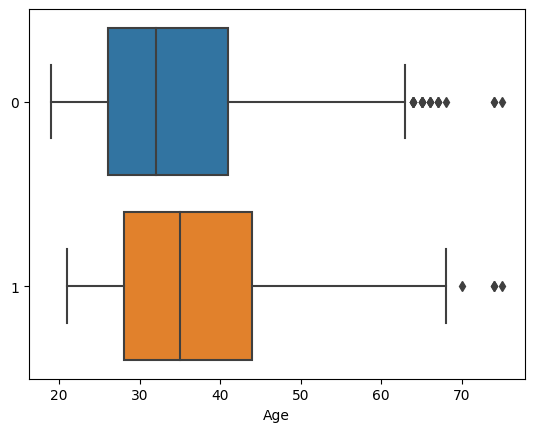

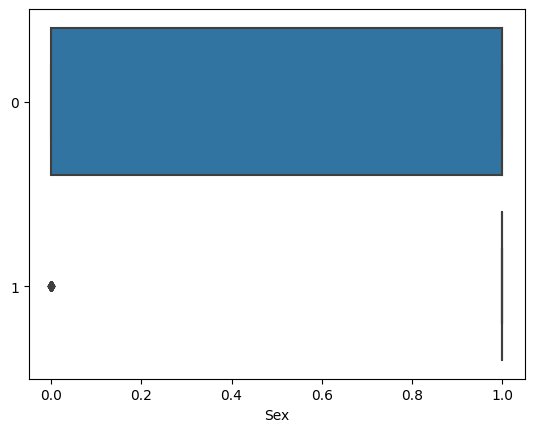

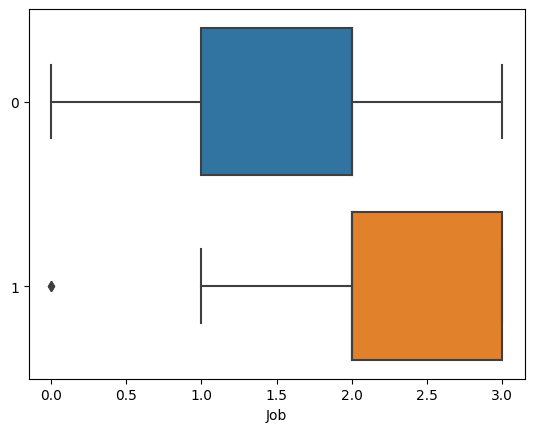

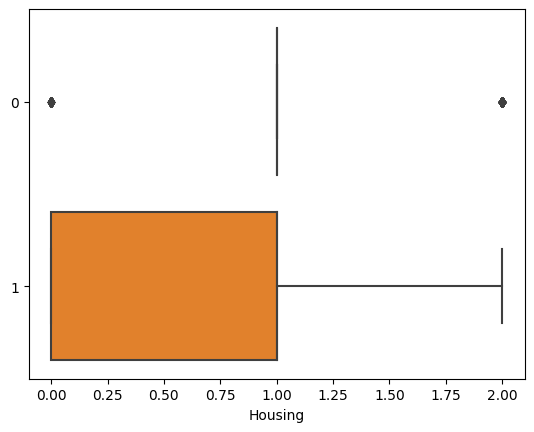

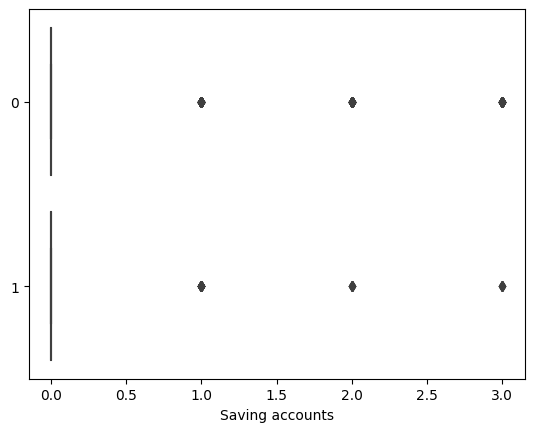

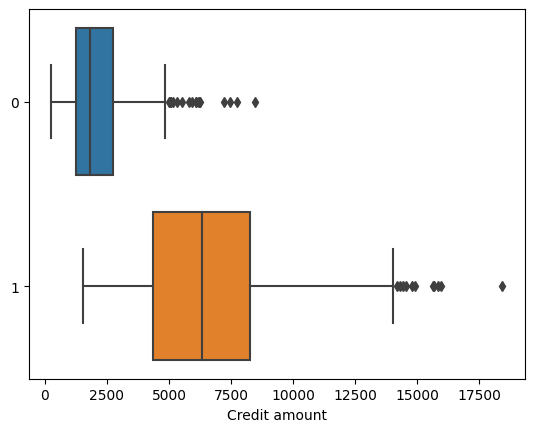

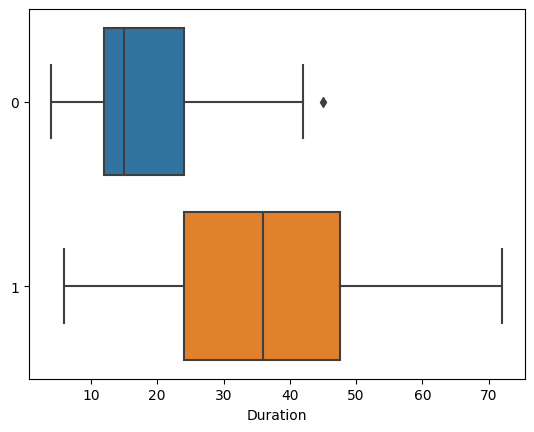

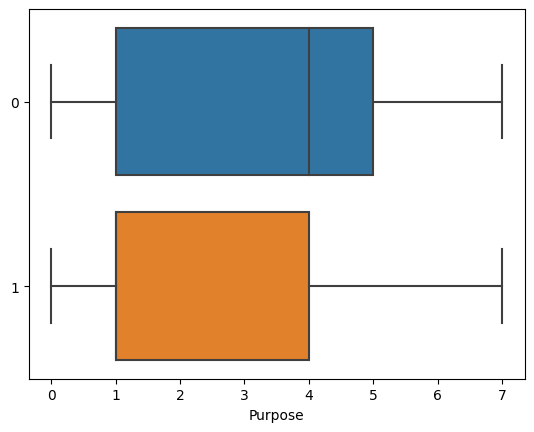

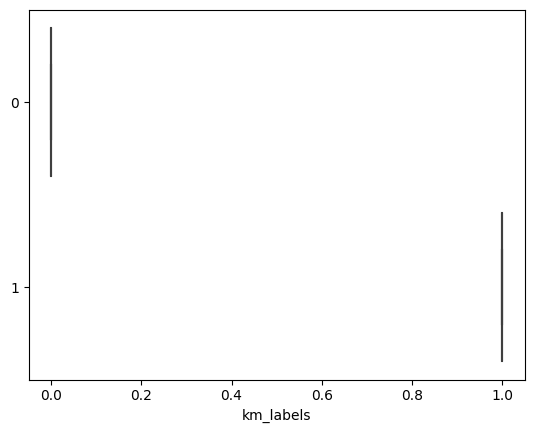

In [141]:
for col in df.columns:
    sns.boxplot(data = df, x = col, y = kmeans_labels, orient = 'h')
    plt.show()

# Интерпритация hierarhical

In [142]:
df['agg_labels'] = agg_labels

df['agg_labels'].value_counts(normalize = True)

0    0.882
1    0.118
Name: agg_labels, dtype: float64

In [143]:
# Расчет средних значений признаков для каждого из кластеров

df.groupby('agg_labels').median().T

agg_labels,0,1
Age,33.0,33.5
Sex,1.0,1.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Credit amount,2054.5,7924.0
Duration,18.0,42.0
Purpose,4.0,1.0
km_labels,0.0,1.0


Алгоритм gglomerativeClustering также утверждает, что клиенты различаются по сумме кредита и срокам погашения

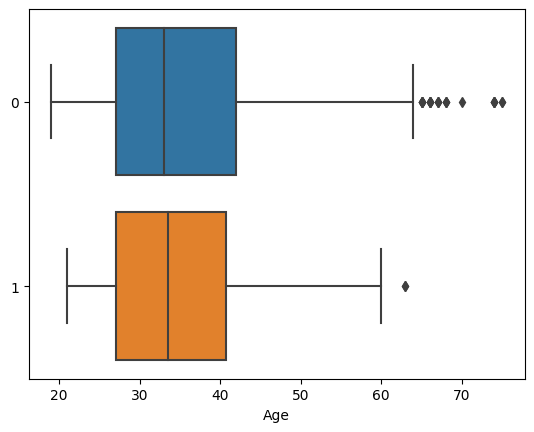

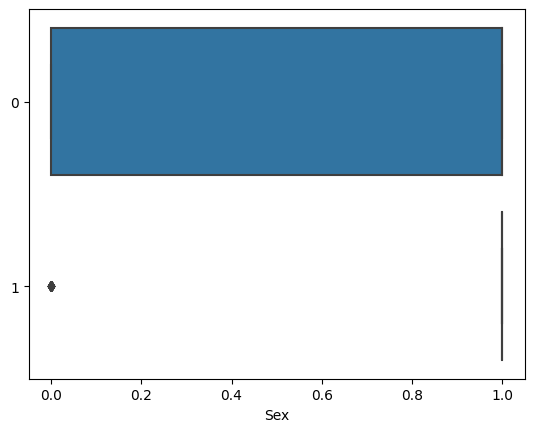

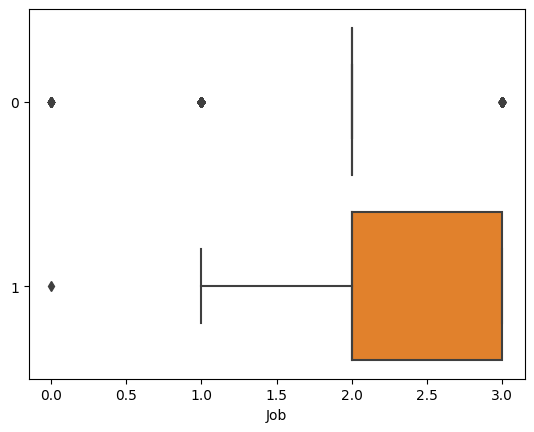

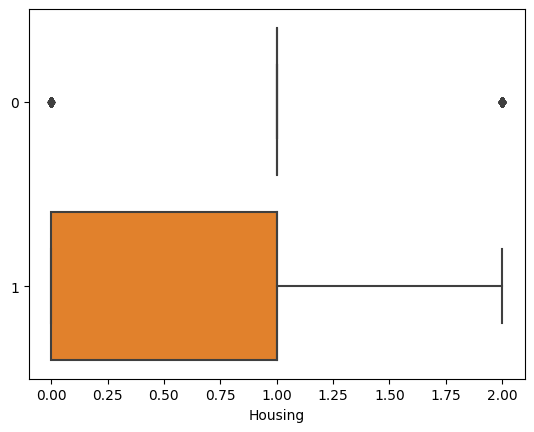

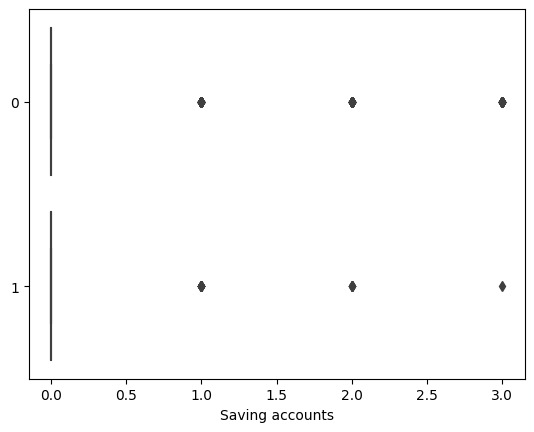

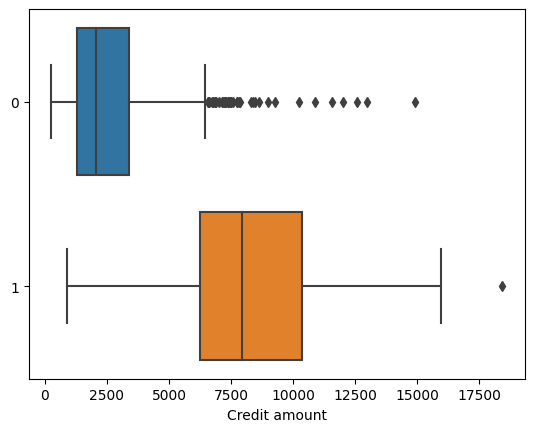

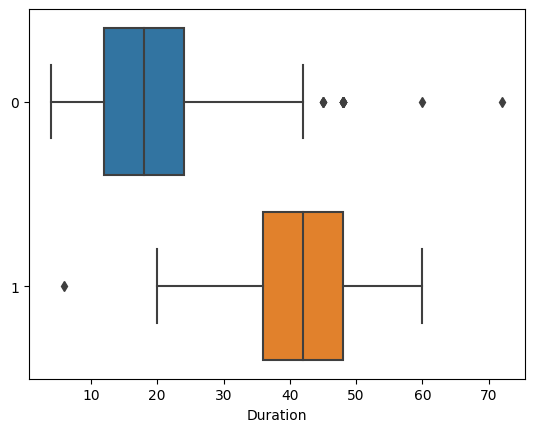

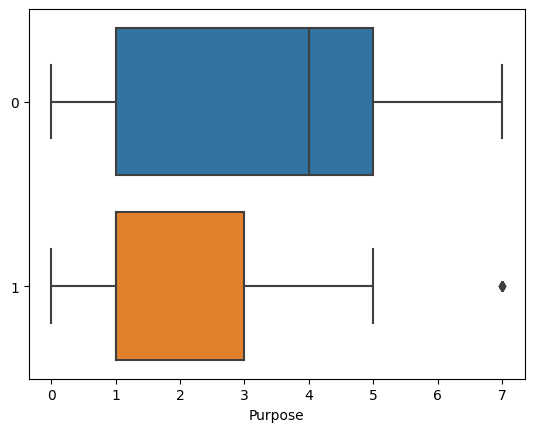

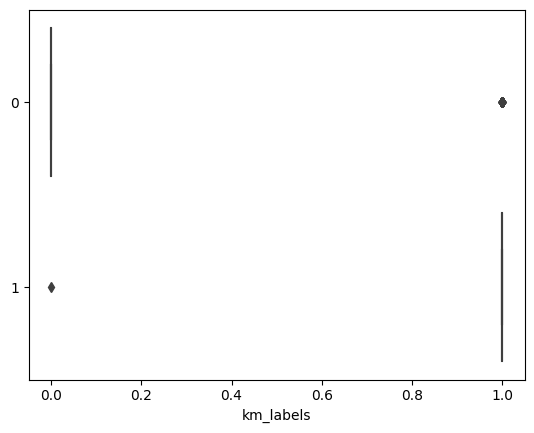

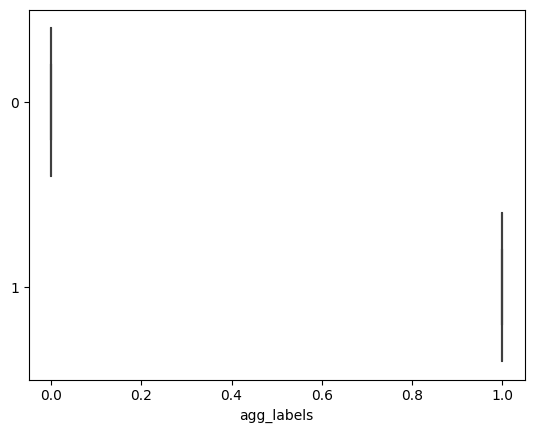

In [144]:
for col in df.columns:
    sns.boxplot(data = df, x = col, y = agg_labels, orient = 'h')
    plt.show()

Информация на графиках boxplot также говорит нам что в 1 группе клиенты старше и в зависимости от принадлежности к группе у клиентов различаются цели кредита

# Интерпритация DBSCAN

In [145]:
df['dbscan_labels'] = dbscan_labels

df['dbscan_labels'].value_counts(normalize = True)

 0    0.665
 1    0.283
-1    0.052
Name: dbscan_labels, dtype: float64

In [146]:
# Расчет средних значений признаков для каждого из кластеров

df.groupby('dbscan_labels').median().T

dbscan_labels,-1,0,1
Age,42.5,35.0,28.0
Sex,0.0,1.0,0.0
Job,2.0,2.0,2.0
Housing,1.0,1.0,1.0
Saving accounts,0.0,0.0,0.0
Credit amount,7420.0,2375.0,1858.0
Duration,33.0,18.0,18.0
Purpose,1.0,3.0,4.0
km_labels,1.0,0.0,0.0
agg_labels,0.0,0.0,0.0


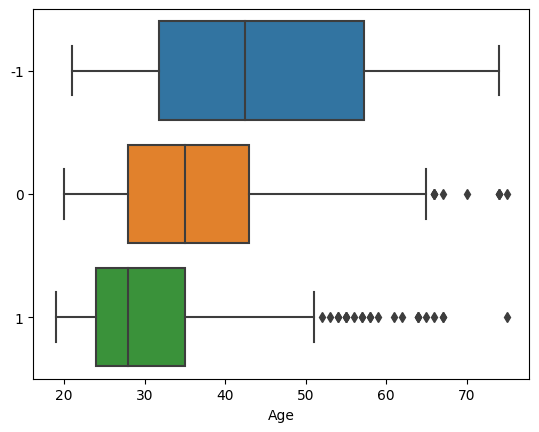

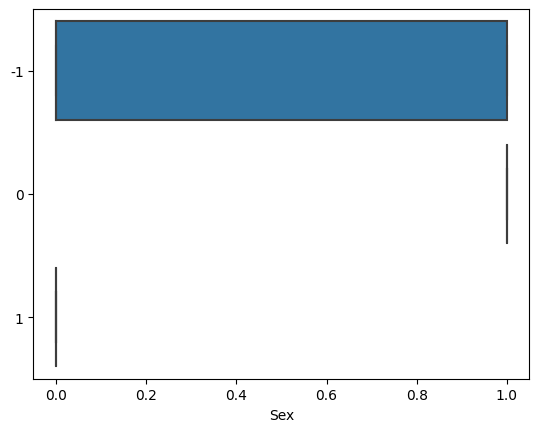

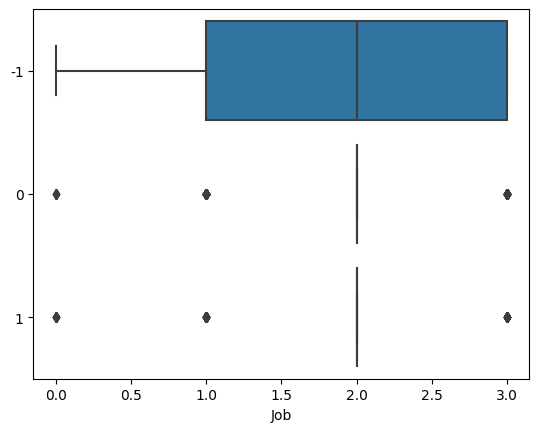

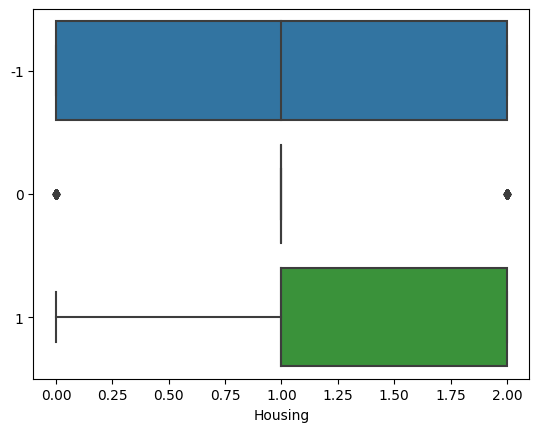

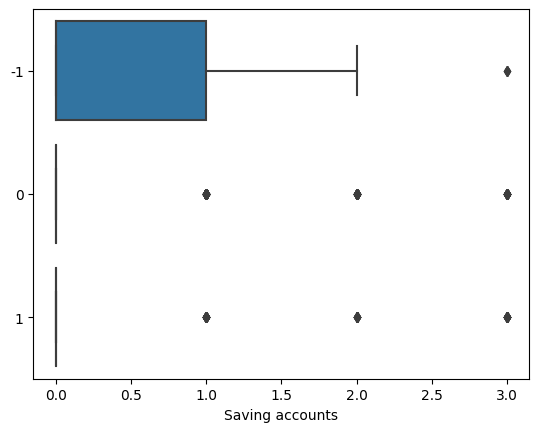

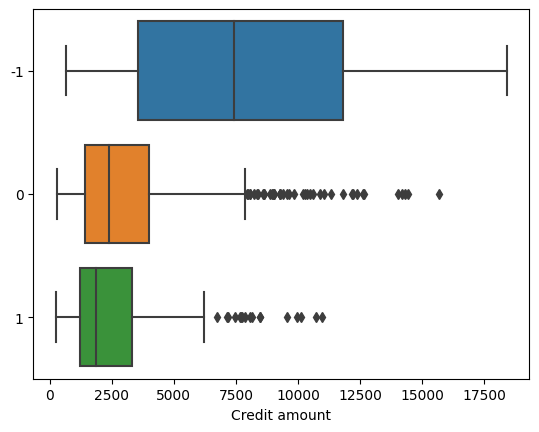

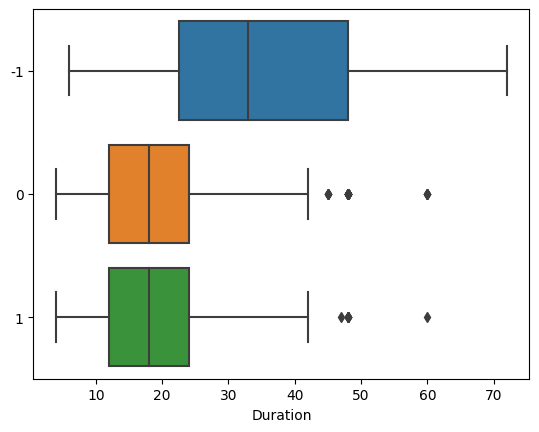

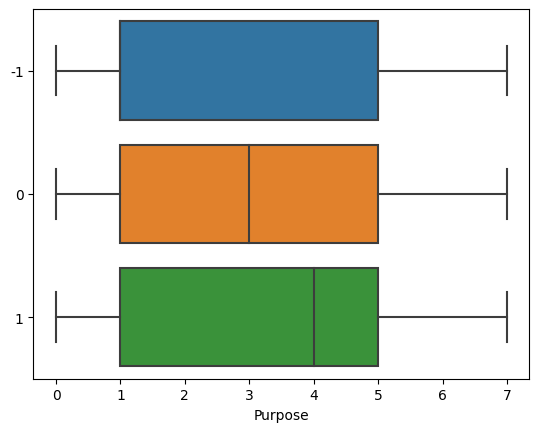

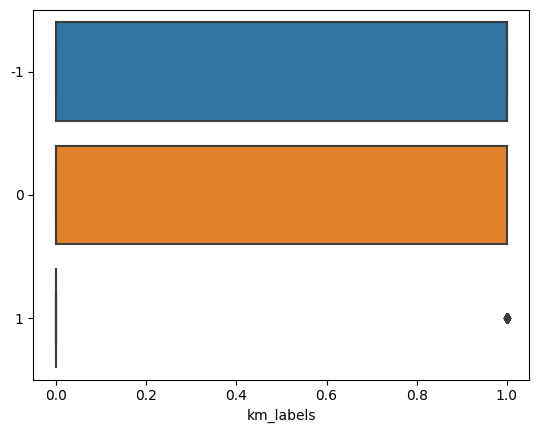

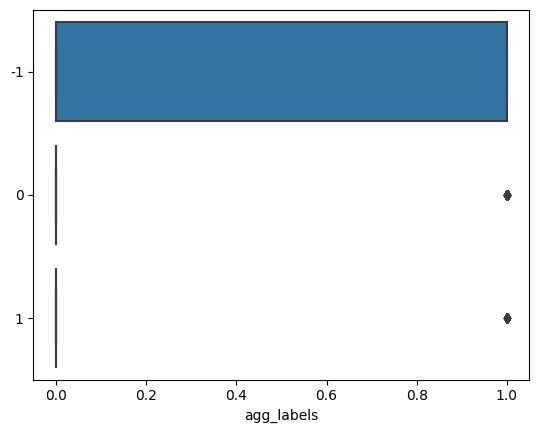

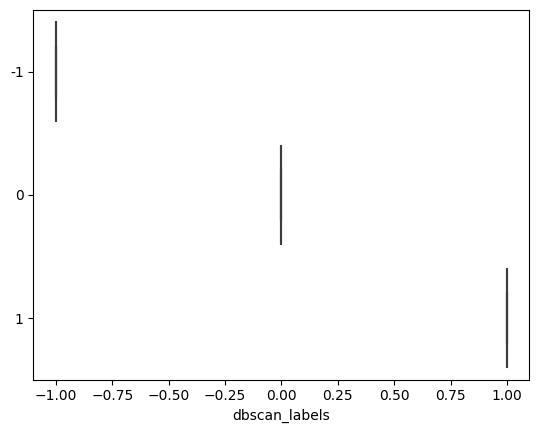

In [147]:
for col in df.columns:
    sns.boxplot(data = df, x = col, y = dbscan_labels, orient = 'h')
    plt.show()

Алгоритм DBScan разделил клиентов на группы по суммам кредита, слишком высокие суммы он посчитал за аномалию. Также критерием разделения клиентов стал их возраст